In [1]:
import nbsetup
from models.load import load_sparc
from models.sparc.result import Result
from models.sparc.tune import Tune
from models.sparc.mcmc import mcmc

In [3]:
SAVE_FIGURES = True
xlabel = 'Log($g_{ratio}$) [$ms^{-2}$]'
FILTER = 'Quality simulation'

In [4]:
raw = Result(load_sparc(namespace='ratio/201_21'))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


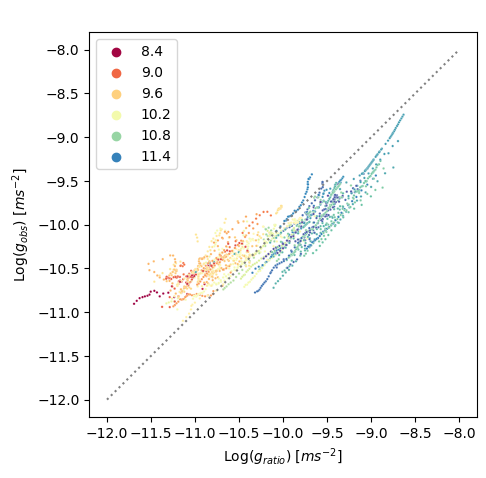

In [5]:
g = raw.plot_rar(kind=0, title=' ', query_key=FILTER, label=xlabel)
if SAVE_FIGURES: g.savefig('../figures/ratio_rar.eps')

In [6]:
analysis = Tune(mcmc(raw.datasets()[FILTER], train_d=False, tight={'Inc': 0.01, 'Ymass': 0.01}))

In [ ]:
tuned = analysis.Result(fast=False, simulations=raw.simulations)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Ymass, Inc]


In [ ]:
for k in tuned.queries_strs.keys():
    g, data = tuned.residual_hist(query_key=k)
    print(k, data.mean(), data.std(), data.count())

Everything -0.002215838269400913 0.13616440586251338 2096
Quality data -0.002215838269400913 0.13616440586251338 2096
Quality simulation 0.001258224426516003 0.06709078678568745 1482


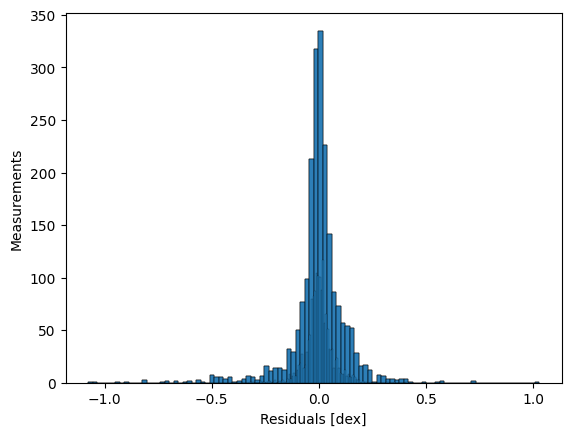

In [7]:
for k in tuned.queries_strs.keys():
    g, data = tuned.residual_hist(query_key=k)
    print(k, data.mean(), data.std(), data.count())

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


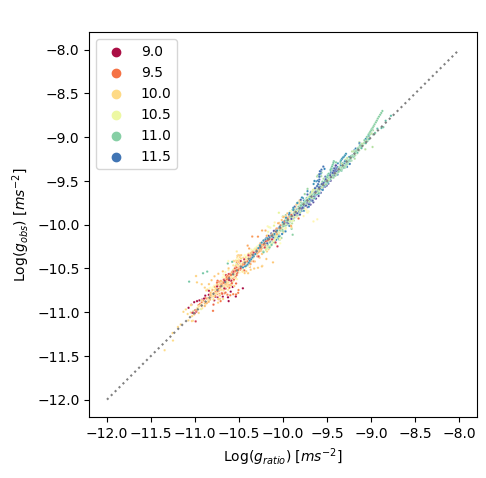

In [8]:
g = tuned.plot_rar(kind=0, title=' ', query_key=FILTER, label=xlabel)
if SAVE_FIGURES: g.savefig('../figures/ratio_tuned_rar_quality.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


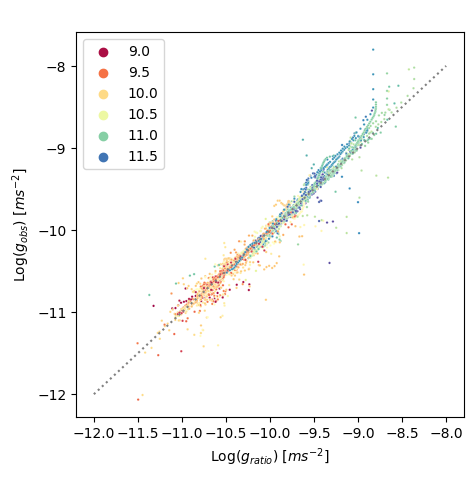

In [9]:
g = tuned.plot_rar(kind=0, title=' ', query_key='Everything', label=xlabel)
if SAVE_FIGURES: g.savefig('../figures/ratio_tuned_rar.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


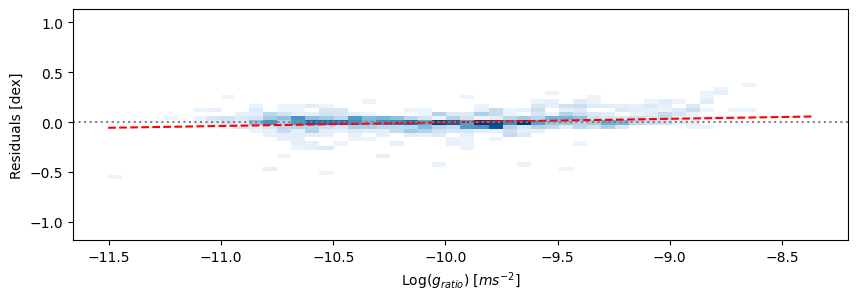

In [10]:
g = tuned.residual(xlabel=xlabel)
if SAVE_FIGURES: g.savefig('../figures/ratio_residual_g.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


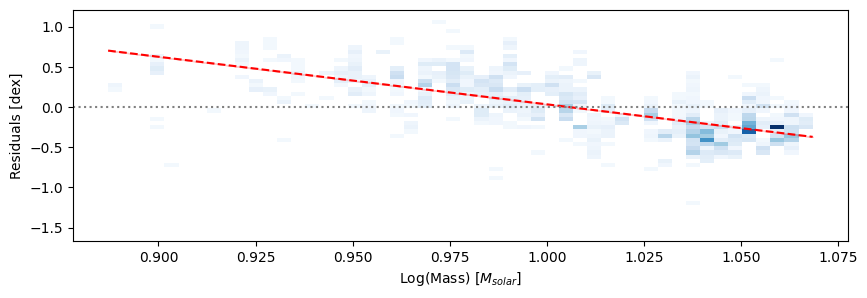

In [11]:
g = raw.residual(resid='log_M', xlabel='Log(Mass) [$M_{solar}$]')
if SAVE_FIGURES: g.savefig('../figures/ratio_residual_m.eps')

/Users/timjdavey/Projects/pmog/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1148: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/timjdavey/Projects/pmog/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1149: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


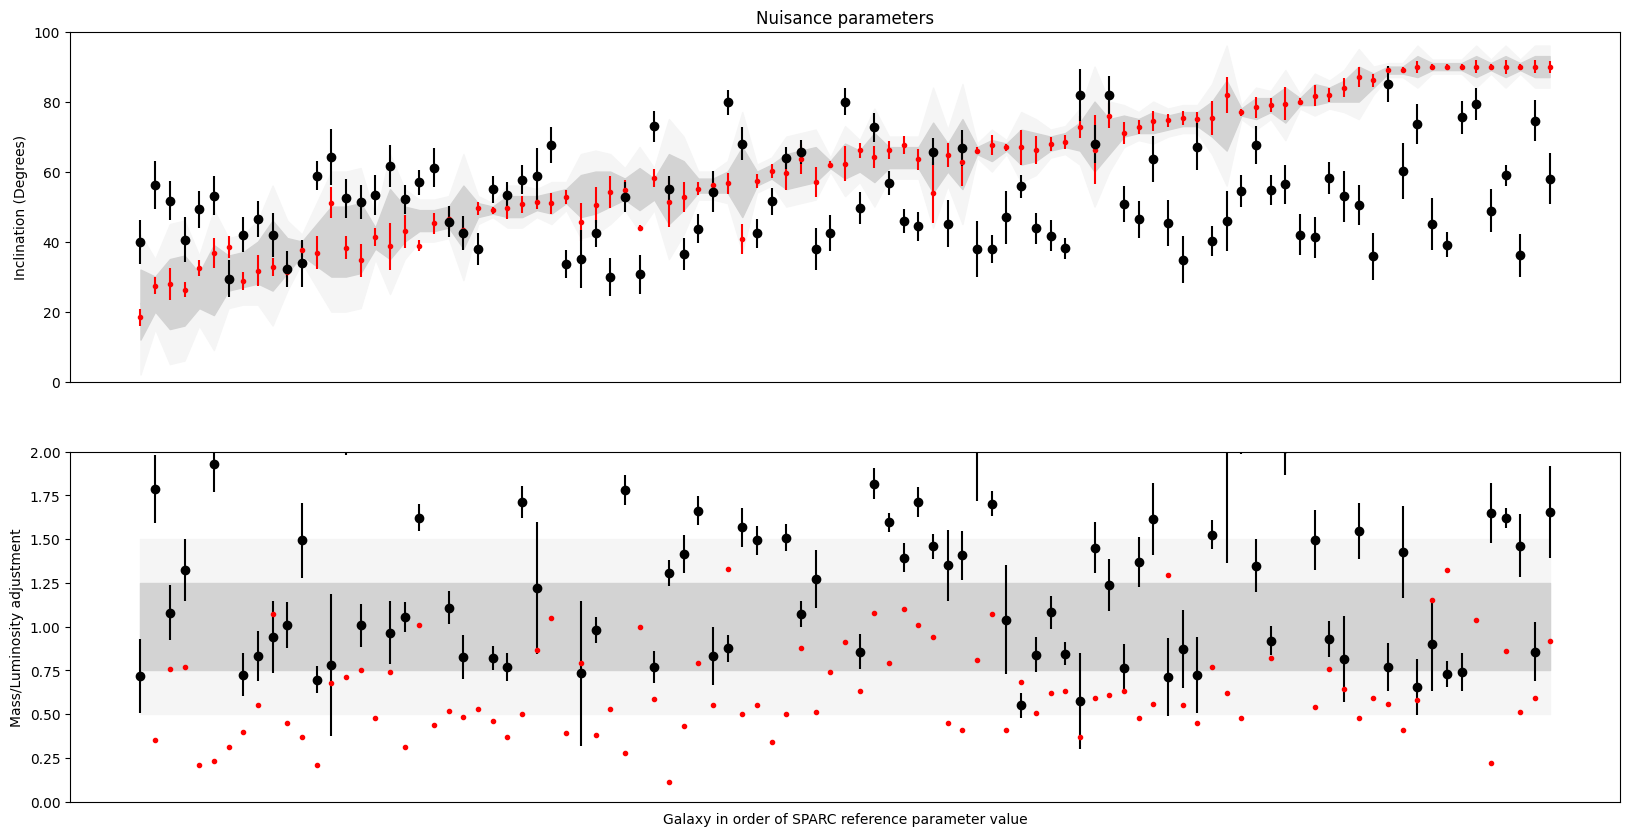

In [12]:
g = analysis.plot_nuissance()

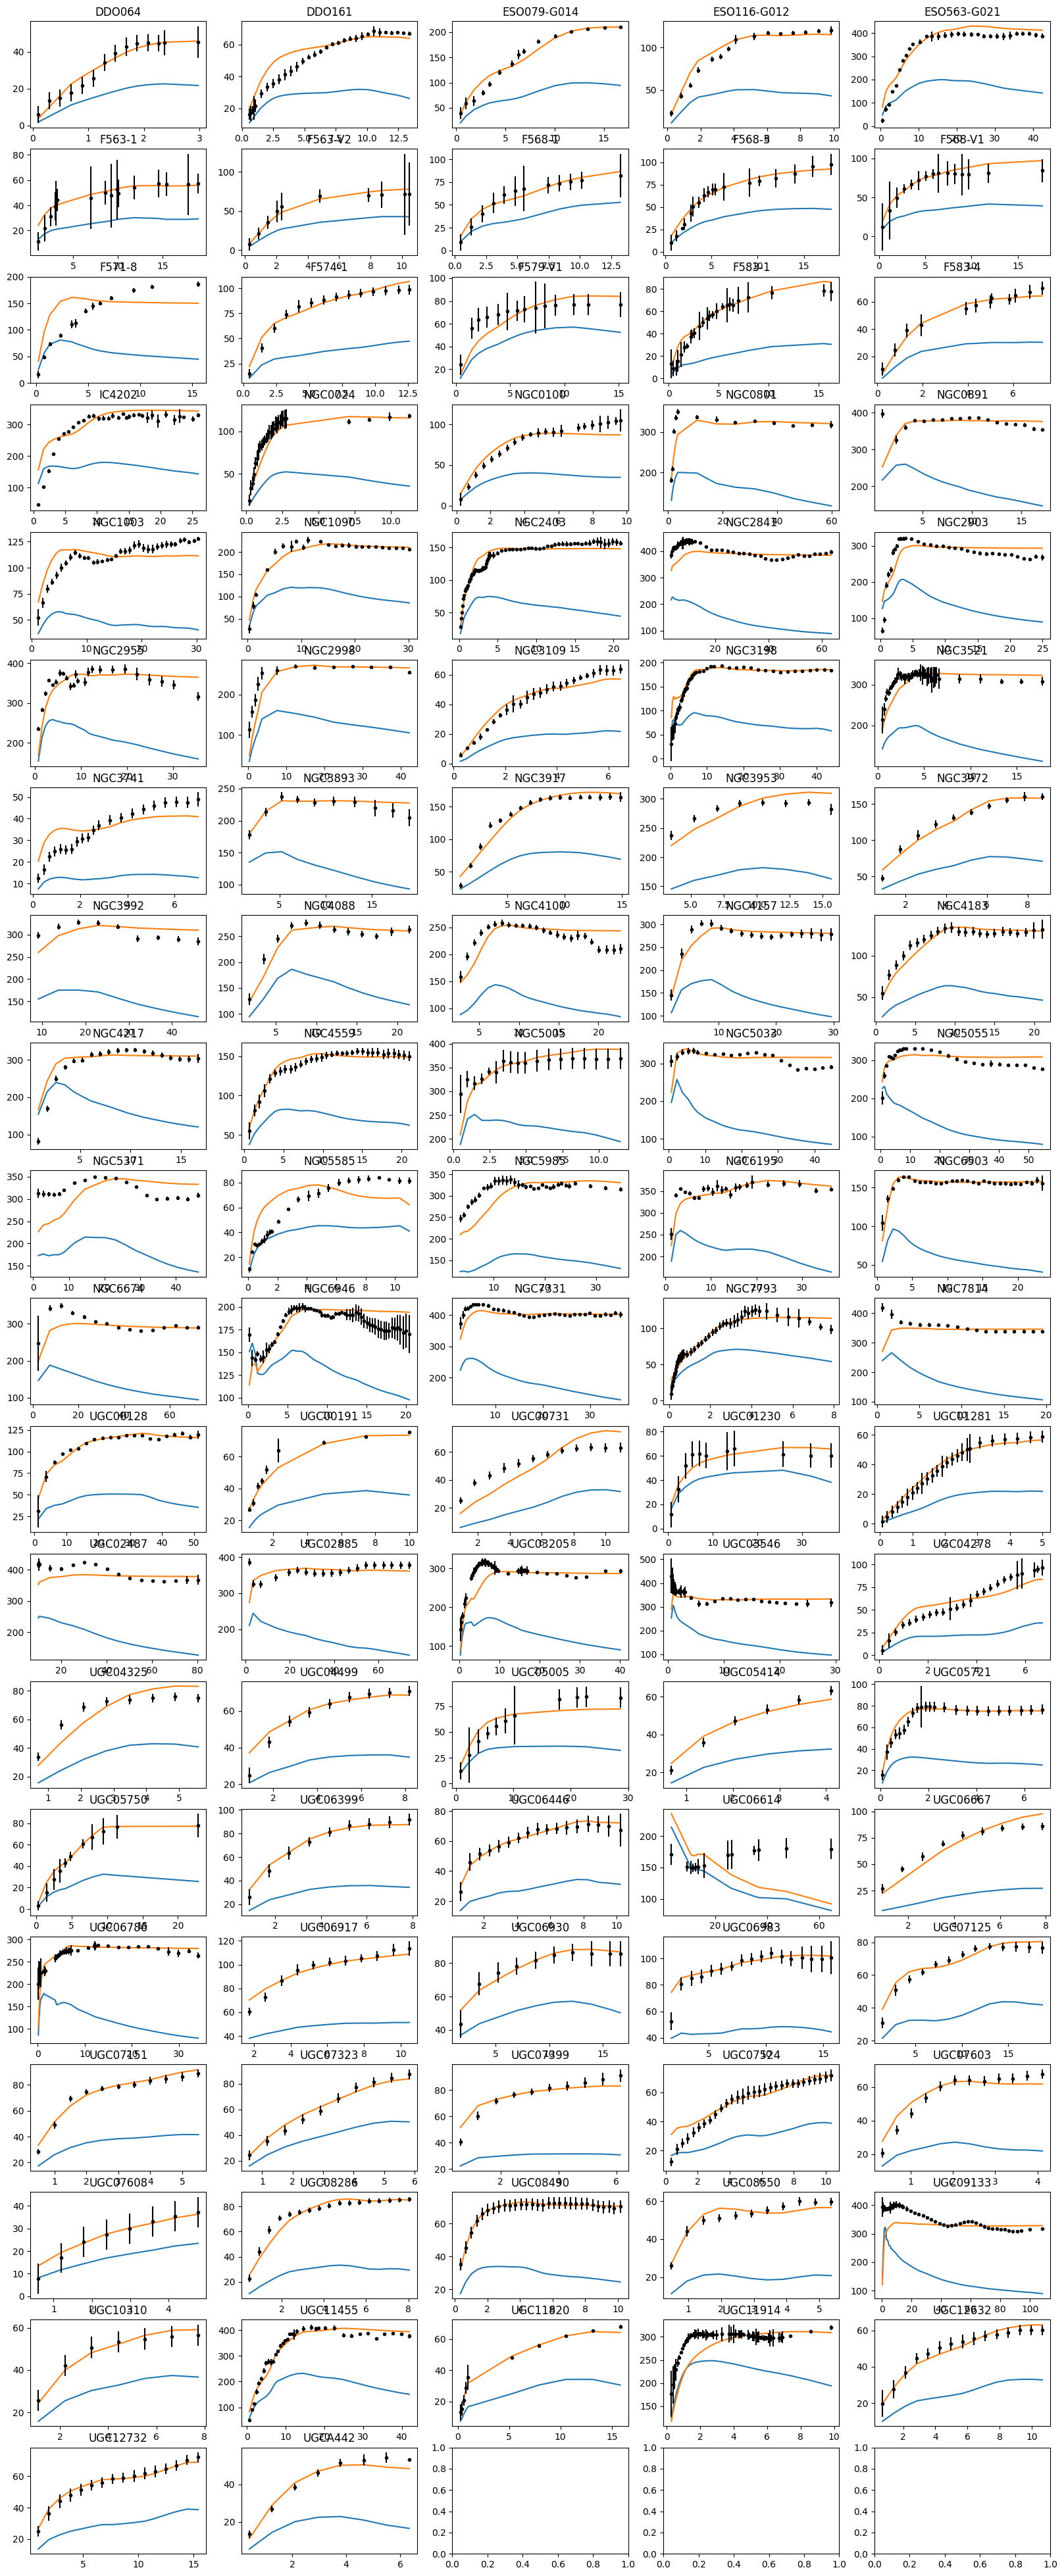

In [13]:
baseline = Result(load_sparc(namespace='baseline/201_21'))
g = tuned.plot_curves(baseline)